**My Personal Notebook for Playing Around With the Data**

**Importing all required libraries**

In [7]:
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

**Saving the data into a dataframe**

In [8]:
df_house = pd.read_csv("data/eda.csv")

df_house.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


**Exploring the data**

In [14]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [10]:
# import missingno
import missingno as msno

In [11]:
# display number of missing values per column
df_house.isna().sum()

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

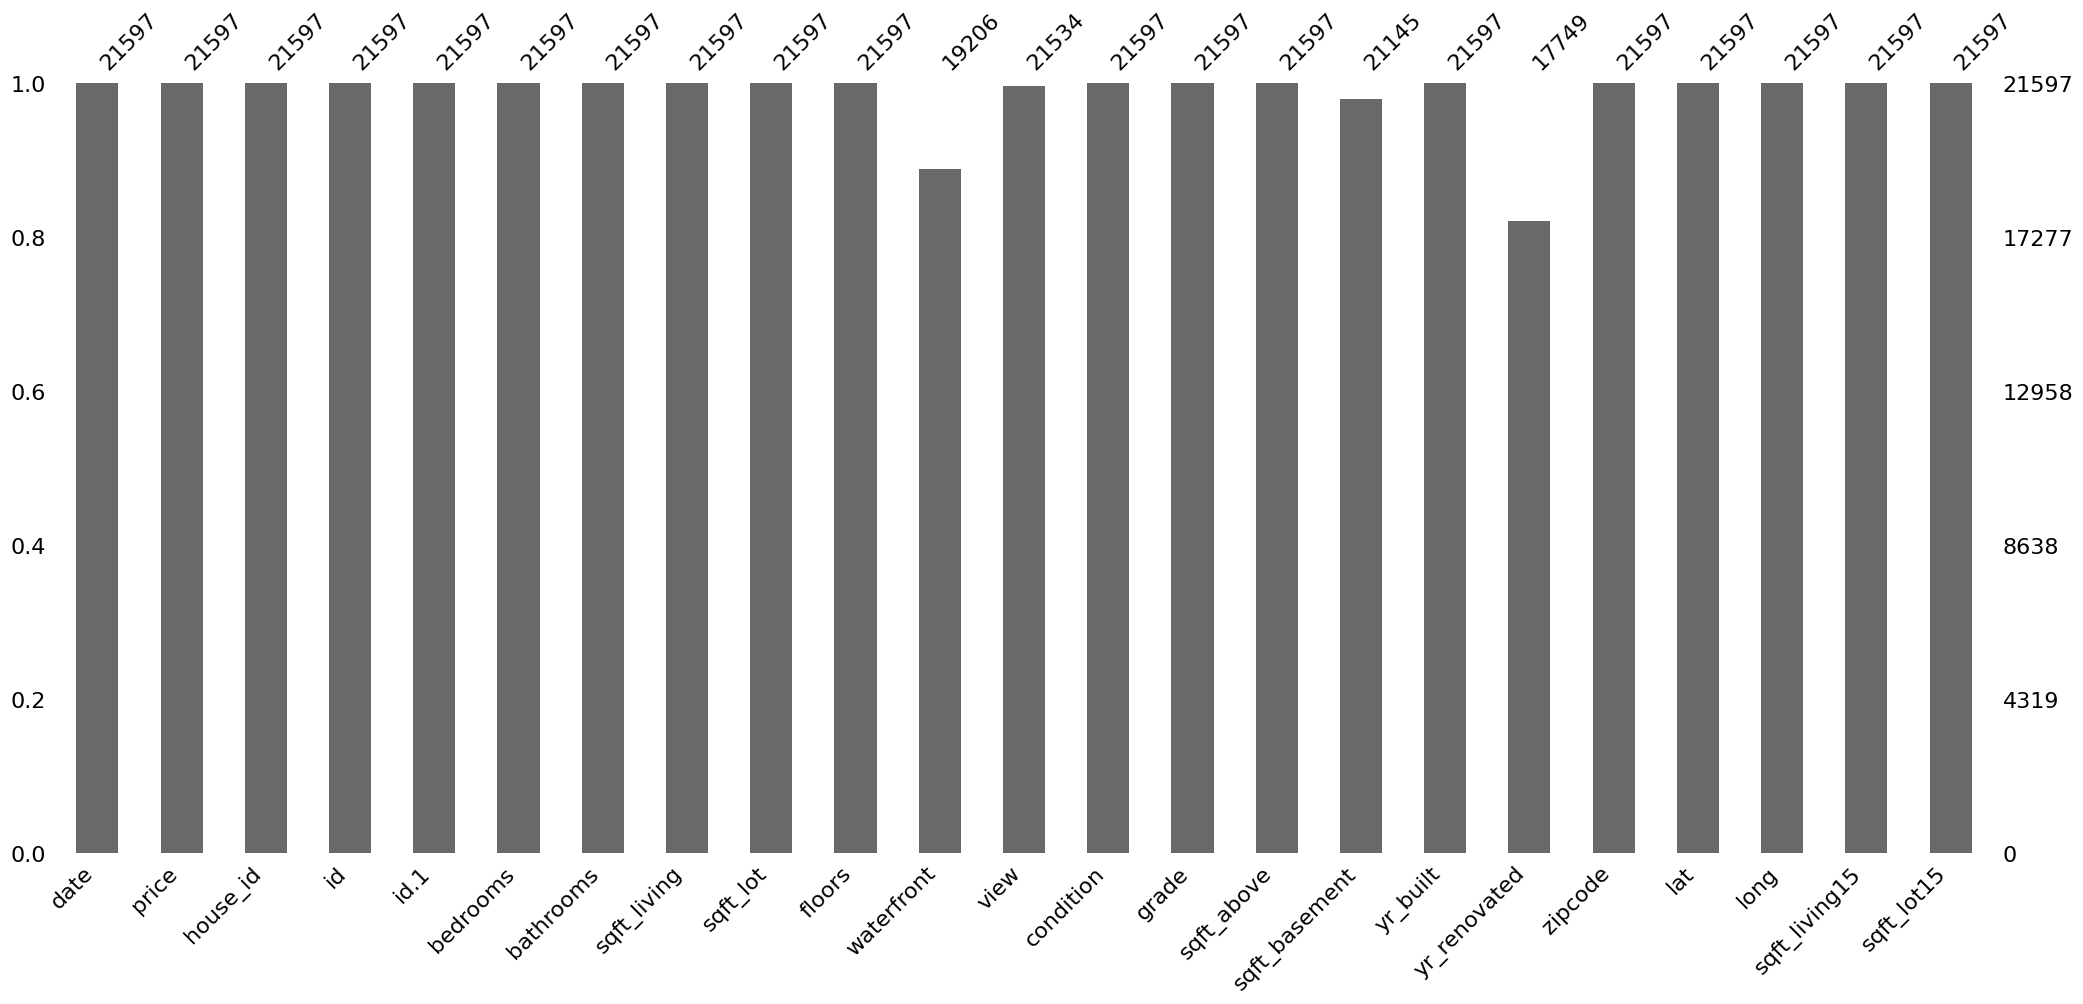

In [12]:
# plotting percentage of missing values per column
msno.bar(df_house)

<Axes: >

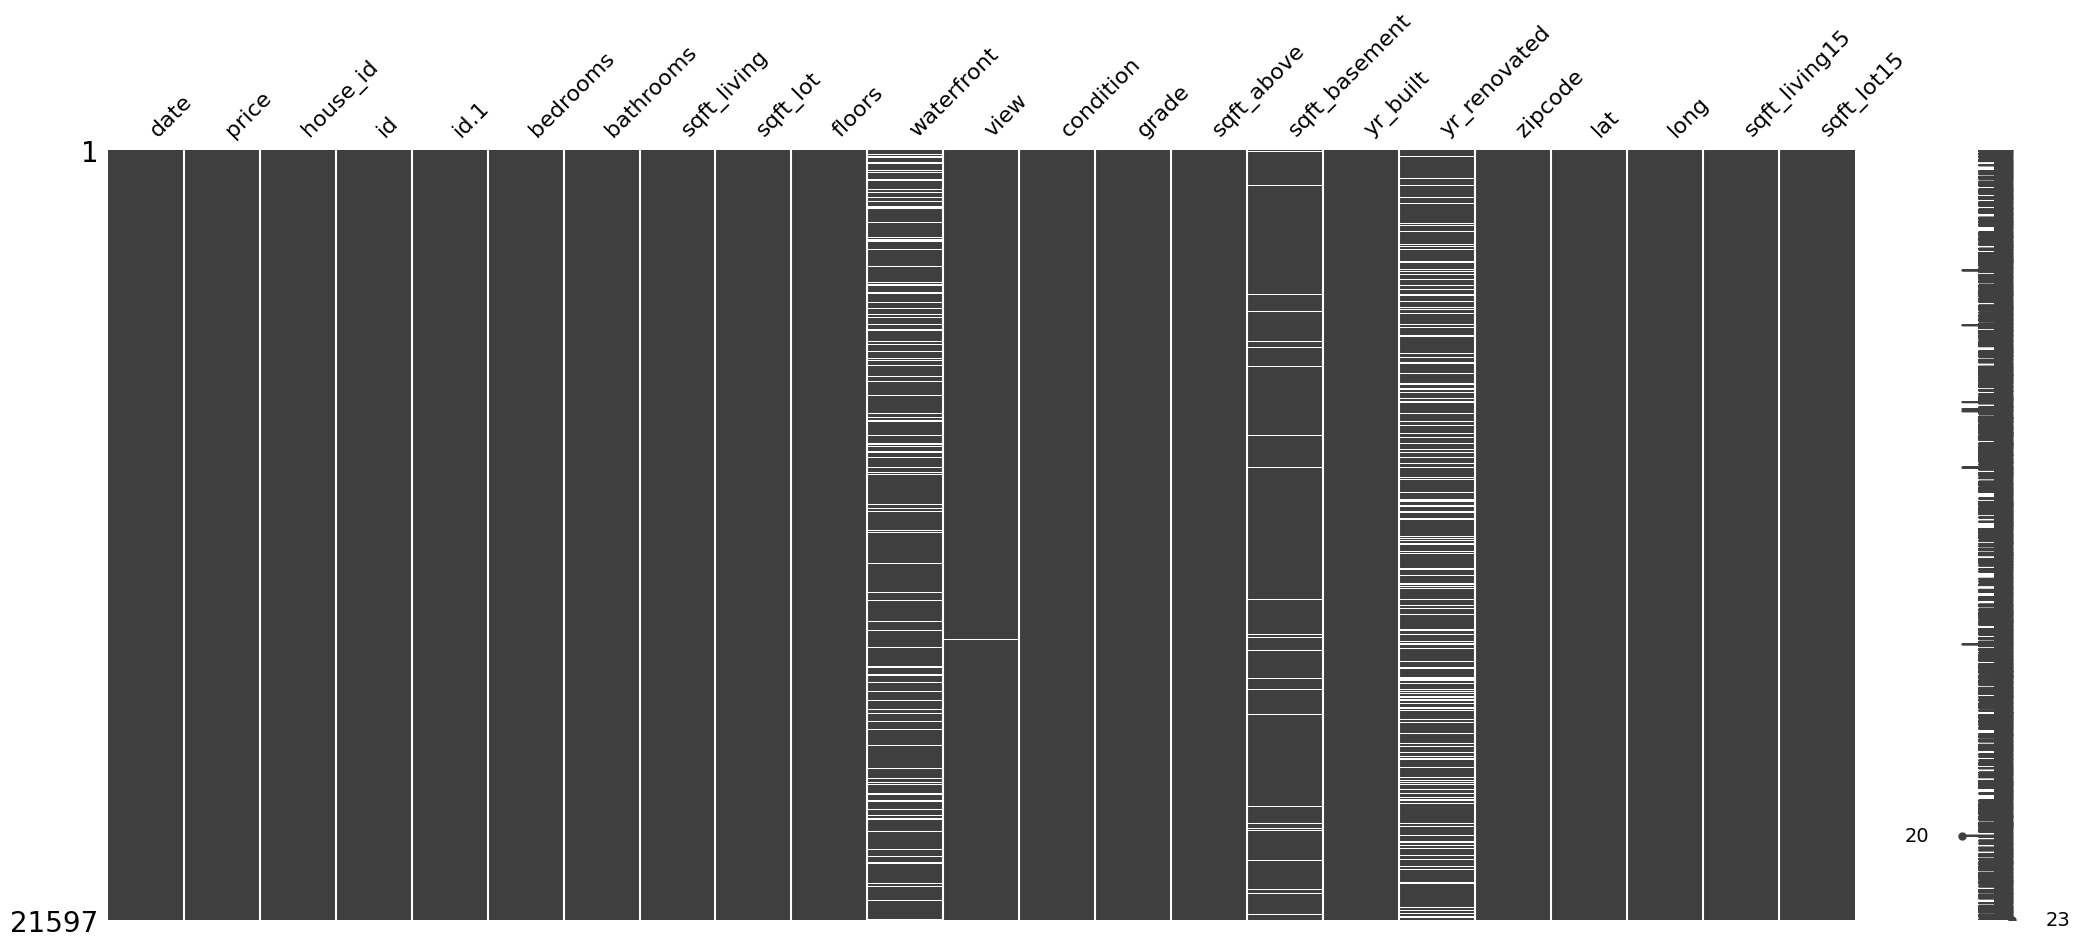

In [13]:
msno.matrix(df_house)

In [16]:
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [17]:
df_house.columns = df_house.columns.str.replace('.','_')
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
# renaming column
df_house = df_house.rename({'lat':'latitude','long':'longitude',
                            'sqft_living15':'living_space_15_neighbours', 'sqft_lot15':'plotsize_15_neighbours',
                            'sqft_living':'livingspace_sqft', 'sqft_lot':'plotsize_sqft',
                            'view':'num_potential_buyers'}, axis=1)
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'livingspace_sqft', 'plotsize_sqft', 'floors', 'waterfront',
       'num_potential_buyers', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'latitude',
       'longitude', 'living_space_15_neighbours', 'plotsize_15_neighbours'],
      dtype='object')

In [26]:
# check how many duplicated rows exist in the data frame
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [27]:
df_house.dtypes

date                           object
price                         float64
house_id                        int64
id                              int64
id_1                            int64
bedrooms                      float64
bathrooms                     float64
livingspace_sqft              float64
plotsize_sqft                 float64
floors                        float64
waterfront                    float64
num_potential_buyers          float64
condition                       int64
grade                           int64
sqft_above                    float64
sqft_basement                 float64
yr_built                        int64
yr_renovated                  float64
zipcode                         int64
latitude                      float64
longitude                     float64
living_space_15_neighbours    float64
plotsize_15_neighbours        float64
dtype: object

In [29]:
# Convert date to datetime format 
df_house.date = pd.to_datetime(df_house.date)
print(df_house['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]


In [32]:
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


<BarContainer object of 21597 artists>

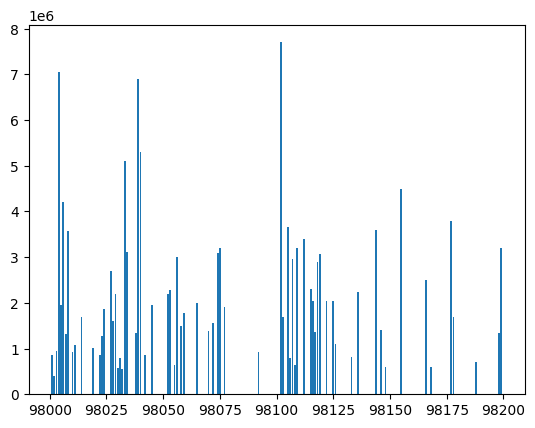

In [33]:
plt.bar(df_house.zipcode,df_house.price)

In [38]:
df_house['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 0, 'Prices')

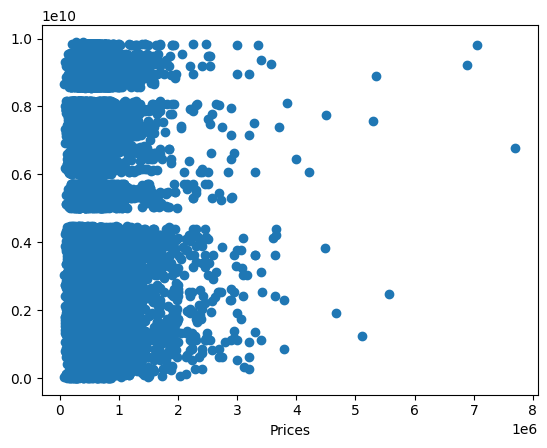

In [41]:
plt.scatter(df_house.price, df_house.house_id)
plt.xlabel('Prices')

In [50]:

df_house_pricegroup = df_house.groupby('price').mean()
df_house_pricegroup.tail()
print(df_house_pricegroup.info)


<bound method DataFrame.info of                 date      house_id       id          id_1  bedrooms  \
price                                                                 
78000.0   2014-05-06  4.000036e+07  15280.0  4.000036e+07       2.0   
80000.0   2014-05-23  8.658300e+09    466.0  8.658300e+09       1.0   
81000.0   2015-03-24  3.028200e+09  16185.0  3.028200e+09       2.0   
82000.0   2014-11-05  3.883800e+09   8268.0  3.883800e+09       3.0   
82500.0   2014-05-08  1.623049e+09   2140.0  1.623049e+09       2.0   
...              ...           ...      ...           ...       ...   
5350000.0 2015-04-13  8.907500e+09   1447.0  8.907500e+09       5.0   
5570000.0 2014-08-04  2.470100e+09   4408.0  2.470100e+09       5.0   
6890000.0 2014-09-19  9.208900e+09   9246.0  9.208900e+09       6.0   
7060000.0 2014-06-11  9.808701e+09   3911.0  9.808701e+09       5.0   
7700000.0 2014-10-13  6.762700e+09   7246.0  6.762700e+09       6.0   

           bathrooms  livingspace_sqft  plot

ValueError: x and y must be the same size

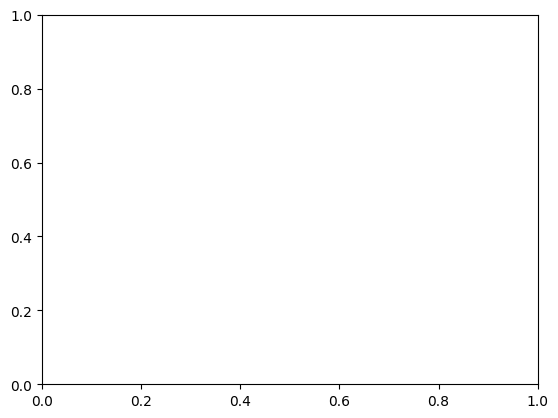

In [53]:
prices = [50000, 100000, 500000, 1000000, 5000000, 10000000]

plt.scatter(prices, df_house_pricegroup.house_id)
plt.xlabel('Prices')

In [ ]:
bins = pd.cut(df_house['Price'], [0, 100, 250, 1500])

df.groupby(bins)['Price'].agg(['count', 'sum'])